In [1]:
import netCDF4
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!make

make: Nothing to be done for `all'.


In [3]:
with netCDF4.Dataset('ocean_hgrid.nc') as nc:
    xg,yg = nc.variables['x'][::2,::2], nc.variables['y'][::2,::2]
with netCDF4.Dataset('ocean_annual.static.nc') as nc:
    wg = nc.variables['wet'][:]

In [4]:
with netCDF4.Dataset('wet_mask_1x1.nc') as nc:
    x,y,wn = nc.variables['lonbnd'][:], nc.variables['latbnd'][:], nc.variables['wet'][:]
    xn,yn = numpy.append(x[:,0],x[-1,1]), numpy.append(y[:,0],y[-1,1])

In [5]:
def comp(xlim,ylim): # Uses global data xg,yg,wg,xn,yn,wn
    plt.figure(figsize=(15,5))
    plt.subplot(121);
    plt.pcolormesh(xg, yg, wg); plt.xlim(xlim);
    plt.ylim(ylim); plt.title('0.5 degree model mask');
    plt.subplot(122);
    plt.pcolormesh(xn, yn, wn); plt.pcolormesh(xn-360, yn, wn);
    plt.xlim(xlim); plt.ylim(ylim); plt.title('Regridded 1x1 mask');

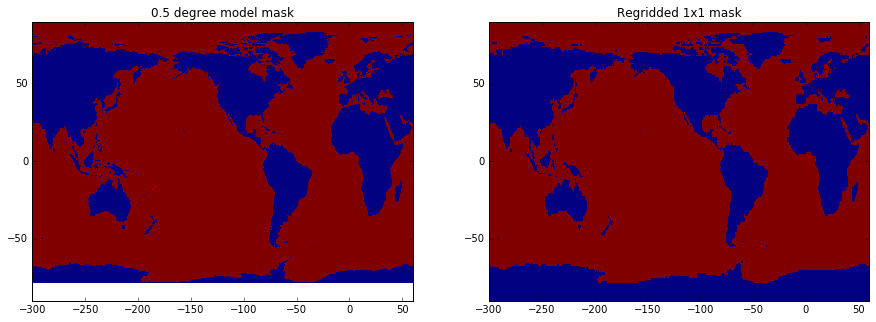

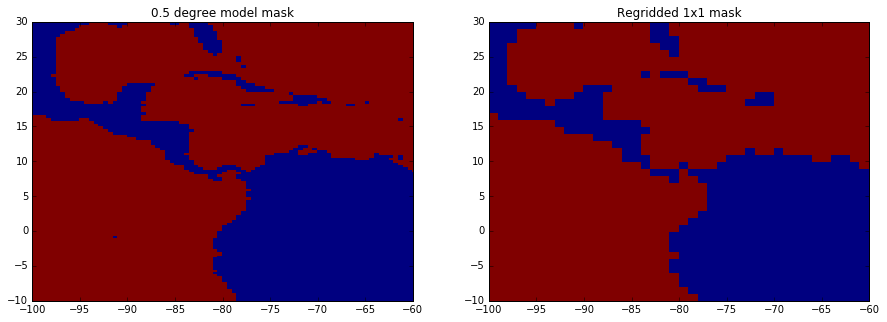

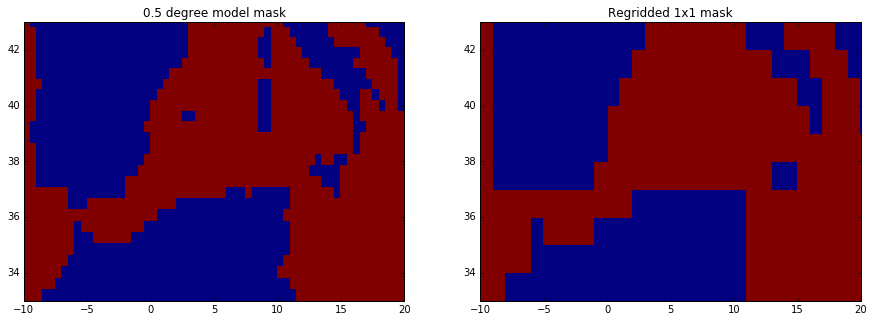

In [6]:
comp((-300,60), (-90,90)) # Global view
comp((-100,-60), (-10,30)) # Panama
comp((-10,20), (33,43)) # Gibraltar Strait